<a href="https://colab.research.google.com/github/swarntam/Play_Store_App_Review_Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Description**

The Play Store apps data has enormous potential to drive app-making businesses to success. <br>
**Actionable insights can be drawn** for developers to work on and capture the Android market.<br>Each app (row) has values for catergory, rating, size, and more. <br>Another dataset contains customer reviews of the android apps.<br>**Explore and analyze the data to discover key factors responsible for app engagement and success**







## **Datasets**
1.[ Play Store Data.csv](https://drive.google.com/file/d/1IDsTM0qvnWzOsa2Y8DQIR18t46sDH7nI/view?usp=sharing)
2. [User Reviews.csv](https://drive.google.com/file/d/18c-Jce1rhQleCcLu8sPgiCLmlu-wkeFp/view?usp=sharing)

### Snapshot of Raw Datasets.
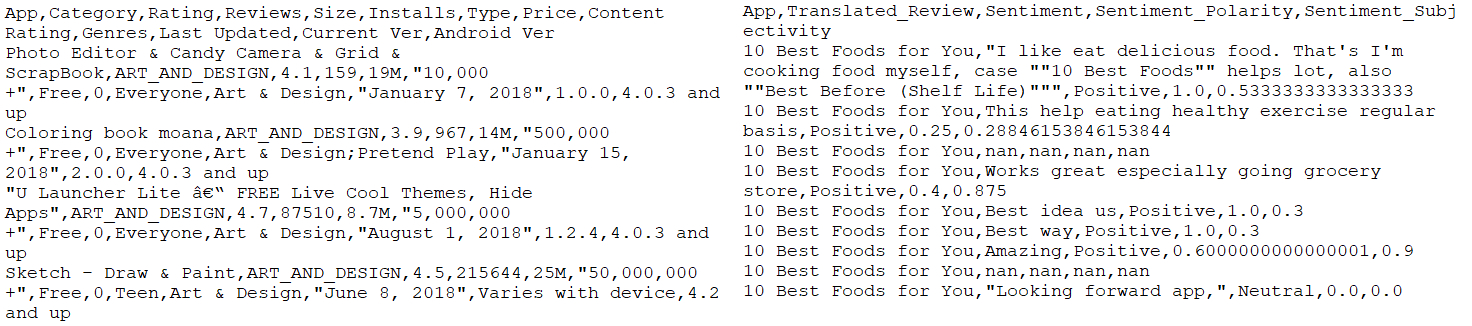

These comma separated values might look clusmy as of now . But don't worry I'm going to be using my tools and more of like best friends .<br>
By the way official name is `Libraries`.

1. **Numpy** for crunching numbers and fast operations.
2. **Pandas** for (*eye-catching*) Data Frames and powerful methods.
3. **Matplotlib** for data visualizations.
4. **Seaborn** on top of matplotlib for beauty.



## **Setting up the Workspace !**

In [ ]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the theme for all plots.
sns.set_theme()

In [ ]:
# Mounting the drive for datasets loading.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the datasets in Python environment. 
file_path = '/content/drive/My Drive/Colab Notebooks/AlmaBetter' \
            + '/Capstone Projects/Exploratory Data Analysis' \
            + '/Play Store App Review Analysis'

data_df = pd.read_csv(file_path + '/Play Store Data.csv')
reviews_df = pd.read_csv(file_path +'/User Reviews.csv')

print('Data Loaded Successfully !')

Data Loaded Successfully !


We are done with our setup. Can't wait to work !

## **But why should we do Exploratory Data Analysis ?**

If I've to sum it up in one line -<br>
`" It's simple!  To get sense of data and determine its potential"`

*Gone are the days when decisions were made on intitution and past experiences.* <br> Now, we all trust **data-driven** insights because data can't lie ! 
We make **inferences** about people and take business decisions based on data we have. It's the data that guides us how to proceed further.


## **A Quick Look of data we have !** 

### 1. <u> Play Store Data

In [ ]:
# Glimpse of top rows.
data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Glimpse of bottom rows.
data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


**You might be wondering why I did both `.head()` and `.tail()` method ?**<br>
Well, we got idea of how data is stored in first method only.
But, to ensure data consistency we did second method too.
And yes it passed but not with flying colors. 

It's worthwile to mention data doesn't always come neat and clean.

In [ ]:
# Getting the shape of data.
data_df.shape

(10841, 13)

 **Observations**
1. I was kind of expecting short names for app or popular names. But here, we have like full details of app.
2. Most of columns have categorical values.
3. And there are some columns which seems like numbers but they are not. I'll tell you later.
4. I've noticed 1 `Nan` value , so we can expect missing values.
5. These `Varies with device` value is going to be challenging.

### 2. <u>Users Reviews

In [ ]:
# Glimpse of top rows.
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Glimpse of bottom rows.
reviews_df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# Getting the shape of data.
reviews_df.shape

(64295, 5)

**Observations**
1. It might look confusing at first as there is repetition of App Names.
2. Actually, there are multiple reviews of same app by multiple users.
3. I'll not comment about `NaN` values of the last 5 rows as of now.
4. From what I can deduce, there are reviews from other languages translated to English language. It makes sense as different countries have different language and Android has huge market.
5. Sentiment analysis has been done on reviews.

P.S -
1. `Nan` values doesn't violate data consistency. It just represents absence of value.
2. Sentiment Analysis is a type of text-mining  which company uses to find social sentiment of their product or service from the raw text information.
Check out [this Medium blog](https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17)  to know more about it.




### **Do all apps present in *reviews_df* are in *data_df* ?**

In [ ]:
reviews_apps = set(reviews_df['App'].unique().tolist())
data_apps = set(data_df['App'].unique().tolist())

reviews_apps.issubset(data_apps)

False

Let's see how many apps present in reviews_apps are not in data_apps.

In [ ]:
non_matching_apps = []

for app in reviews_apps :
    if app not in data_apps:
        non_matching_apps.append(app)
        
len(non_matching_apps)        

54

We have 54 additional apps in reviews_df.

## **Data Wrangling !**

Now, the most important process before Analysing Data.<br>
I'm going to check for missing values,any errors, enriching the raw data and more, to make the data more understandable !

### Checking for duplicates.

1. <u>Play Store Data

In [ ]:
# Number of duplicate enteries.
sum(data_df.duplicated())

483

In [ ]:
# Finding duplicate records' indexes.
duplicates = data_df[data_df.duplicated()]
duplicates_indexes = duplicates.index.to_list()
len(duplicates_indexes)

483

There are 483 duplicate records.<br>
I'll drop duplicates.

In [ ]:
# Dropping duplicate records.
data_df.drop(duplicates_indexes,axis=0,inplace=True)

2. <u>Users Reviews

In [ ]:
# Number of duplicate enteries.
sum(reviews_df.duplicated())

33616

These numbers are huge. There's a strong possibilty null values are also accounted for. <br>
Let's have a look at duplicate records.

In [ ]:
reviews_df[reviews_df.duplicated()].isnull().sum()

App                           0
Translated_Review         25881
Sentiment                 25881
Sentiment_Polarity        25881
Sentiment_Subjectivity    25881
dtype: int64

Wherever there are null values, all columns are Null leaving the app name. I'll drop them.<br>

In [ ]:
# Finding duplicate records' indexes.
duplicates2 = reviews_df[reviews_df.duplicated()]
duplicates_indexes2 = duplicates2.index.to_list()
len(duplicates_indexes2)

33616

In [ ]:
# Dropping the duplicate records.
reviews_df.drop(duplicates_indexes2,axis=0,inplace=True)

### Missing Values Analysis and Treatment

1. <u> Play Store Data

In [ ]:
# Checking for missing values.
data_df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

There are some columns having missing values.<br>
That's OK. But what is **not OK** the missing values in Rating.
Rating could be key indicator of App Suceess or Failure!<br>
After all `CUSTOMER SATISFACTION IS TOP PRIORITY !`

In [ ]:
# Finding out number of missing values in missing columns.
missing_cols = [x for x in data_df if data_df[x].isnull().any()]
missing_values_total = [data_df[x].isnull().sum() for x in missing_cols]
missing_perct = [round(x/len(data_df),4) for x in missing_values_total]

missing_cols_df1 = pd.DataFrame({'Columns': missing_cols,
                                 'No. of missing values': missing_values_total,
                                 '%': missing_perct})
missing_cols_df1

,Columns,No. of missing values,%
0,Rating,1465,0.1414
1,Type,1,0.0001
2,Content Rating,1,0.0001
3,Current Ver,8,0.0008
4,Android Ver,3,0.0003


1. No missing values attract our attention as they don't even contribute to 1 % of data.
2. Well, we kind of need to impute Rating values, just because of one column having missing value , dropping them would result in loss of other information. 1400 + records may not be 1%, but they are good amount of numbers.

In [ ]:
# Summary statistics for Rating.
data_df['Rating'].describe()

count    8893.000000
mean        4.189542
std         0.545452
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
# Unique Ratings.
data_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

There are only 5 options to rate on Play Store - 1,2,3,4,5 stars.<br>
It turns out these are average ratings.

Have a look at ratings of an app on Play Store !

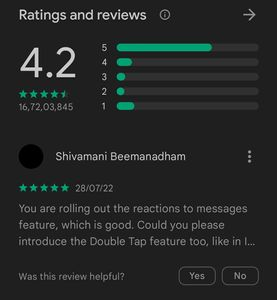

There is one rating which is 19 which is not possible !<br>
There might have been some mistake. <br>
Let's particulary investigate that value - 


In [ ]:
# Checking out misleading record.
data_df[data_df['Rating']==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This particular record is totally messed up.<br>
It's like every value has shifted one place left.
As it is only one record , I'll drop it.

In [ ]:
# Dropping the above record.
data_df.drop(10472,axis=0,inplace=True)

As the missing values are not even 1 % , I'll take a very **Layman approach** to impute them.<br>
I'll impute the missing values according to **average rating of respective Category** and in this way , there won't be any bias on summary statistics.

In [ ]:
# Category-wise average ratings.
cat_avg_ratings = data_df.groupby('Category')['Rating'].mean()
cat_avg_ratings.head()

Category
ART_AND_DESIGN         4.358065
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.347458
BUSINESS               4.102593
Name: Rating, dtype: float64

In [ ]:
np.where(data_df['Rating'].isnull())[0]

array([  288,   431,   432, ..., 10392, 10393, 10394])

2. <u> Users Reviews

In [ ]:
reviews_df.shape

(30679, 5)

In [ ]:
reviews_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [ ]:
987/len(reviews_df)

0.032171843932331565

Apart from name of app, all other details are missing for around 982 records. Looking at numbers , it looks like all missing values have same indexes.<br> For the 5 values we don't have Translated_Review, but other analysis done on that review are there. We're gonna keep that 5 records.

Let's clear the air and be sure !

In [ ]:
# Getting list of indexes of missing values for missing columns.
missing_indexes = []

for col in reviews_df.columns[1:]:
    indexes = np.where(reviews_df[col].isna())[0]
    missing_indexes.extend(indexes)
 

In [ ]:
len(missing_indexes)

3933

In [ ]:
# creating a dictionary of frequency of values.
indexes_freq = {} 

for index_ in missing_indexes :
    indexes_freq[index_] = indexes_freq.get(index_,0) + 1

# Whichever has appeared once are the ones to keep.
indexes_to_keep = [x for x in indexes_freq.keys() \
                   if indexes_freq[x] == 1 ]
indexes_to_keep                   

[160, 8382, 11318, 15271, 25435]

In [ ]:
# Checking whether all indexes are same for all missing values.
# Now we can remove these 5 and check if all indexes have frequencies of 4 .


Looking at indexes, it is clear all missing values in columns have same indexes.

We have no other option but to **drop** all these rows.<br>
They are precise textual reviews and sentiment analysis totally dependent on that.

We can't just impute these information.


### **This raises the question Data Quality or Data Quantity ?**